## 

# Capítulo 10: Redes Neuronales Convolucionales

## CNN para clasificar digitos manuscritos

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 9

In [2]:
# importamos las librerias necesarias
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

In [3]:
# Cargar el conjunto de datos MNIST
(X_ent, y_ent), (X_pru, y_pru) = mnist.load_data()

In [4]:
X_ent.shape

(60000, 28, 28)

In [5]:
# Preprocesamiento de datos
X_ent = X_ent.reshape((60000, 28, 28, 1)).astype('float32') / 255
X_pru = X_pru.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_ent = to_categorical(y_ent)
y_pru = to_categorical(y_pru)

In [6]:
# Construir la arquitectura de la CNN
modelo = Sequential()
modelo.add(Input(shape=(28,28,1)))
modelo.add(Conv2D(32, (5, 5), activation='relu'))
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Conv2D(64, (5, 5), activation='relu'))
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Flatten())
modelo.add(Dense(10, activation='softmax'))
modelo.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 8, 8, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 4, 4, 64)            │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 1, 1, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 52,746 (206.04 KB)

 Trainable params: 52,746 (206.04 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# Compilar el modelo
modelo.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
X_ent.shape

(60000, 28, 28, 1)

In [12]:
# Entrenar el modelo
modelo.fit(X_ent, y_ent, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 15s 15ms/step - accuracy: 0.8420 - loss: 0.5885 - val_accuracy: 0.9697 - val_loss: 0.0992
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9736 - loss: 0.0881 - val_accuracy: 0.9801 - val_loss: 0.0654
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9830 - loss: 0.0582 - val_accuracy: 0.9822 - val_loss: 0.0584
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9869 - loss: 0.0456 - val_accuracy: 0.9852 - val_loss: 0.0500
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.9884 - loss: 0.0372 - val_accuracy: 0.9876 - val_loss: 0.0427


In [13]:
# Evaluar el modelo en el conjunto de prueba
perd_pru, prec_pru = modelo.evaluate(X_pru, y_pru)
print(f'Precisión en el conjunto de prueba: {prec_pru * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9831 - loss: 0.0543
Precisión en el conjunto de prueba: 98.80%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


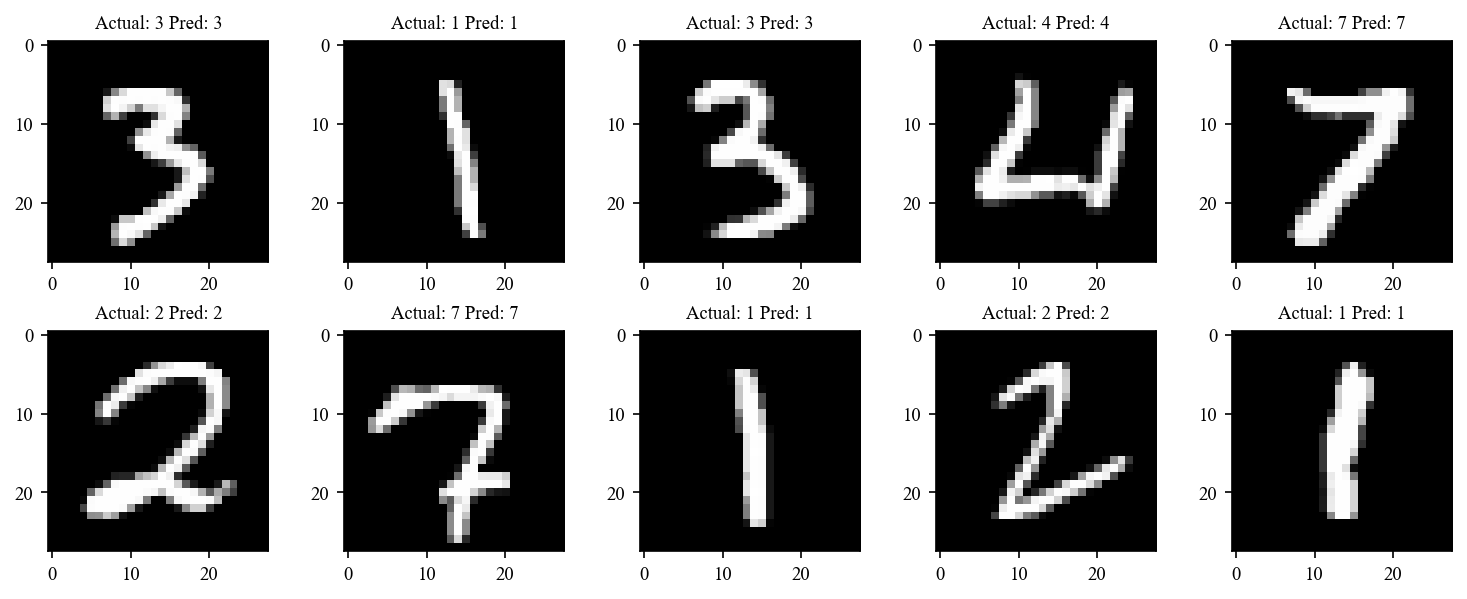

In [14]:
import numpy as np
actuales = np.argmax(y_pru[30:40], axis=1)
preds = modelo.predict(X_pru[30:40])
etiquetas = np.argmax(preds,axis=1)
imagenes = np.squeeze(X_pru[30:40])
num_muestras = 10  
plt.figure(figsize=(10, 4))

for i in range(num_muestras):
    plt.subplot(2, 5, i + 1)
    plt.imshow(np.reshape(imagenes[i], [28,28]), cmap='Greys_r')         
    plt.title('Actual: ' + str(actuales[i]) + ' Pred: ' + str(etiquetas[i]),
                               fontsize=9)    

plt.tight_layout()
plt.show()

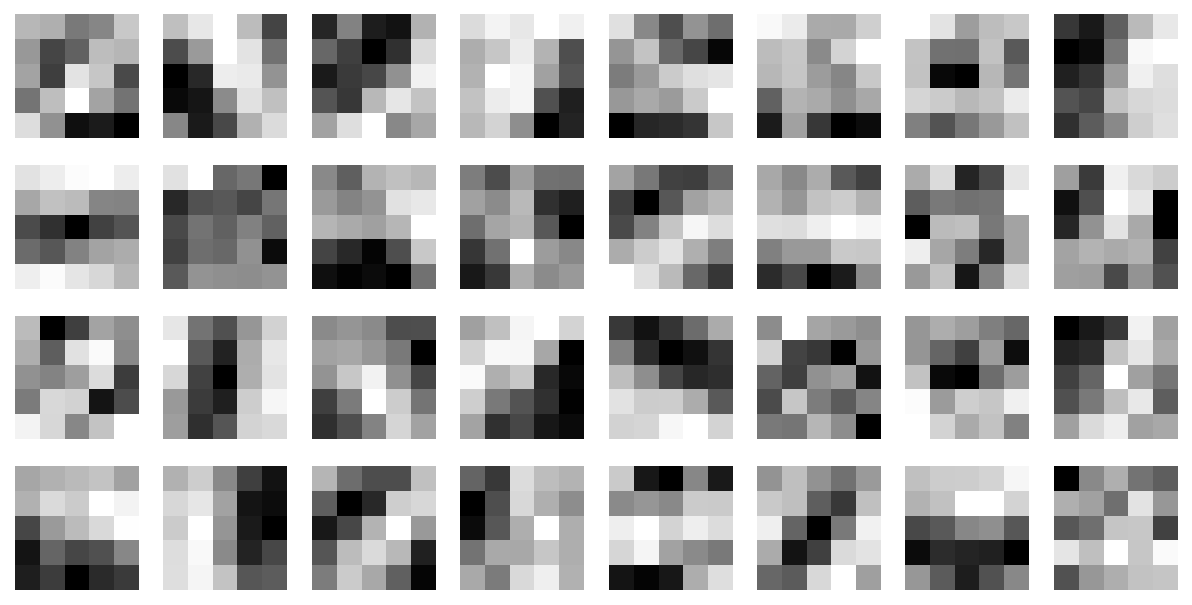

In [15]:
import matplotlib.pyplot as plt
# Obtener los pesos de la primera capa (filtros)
pesos_primera_capa = modelo.layers[0].get_weights()[0]

# Visualizar los filtros de la primera capa
plt.figure(figsize=(10, 5))
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(pesos_primera_capa[:, :, 0, i], cmap='gray')
    plt.axis('off')

plt.show()

### CNN para clasificar imágenes del dataset CIFAR-10

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.utils import to_categorical

In [32]:
# Obtenemos los datos, los separamos en conjunto de entrenamiento y prueba:
(X_ent, y_ent), (X_pru, y_pru) = cifar10.load_data()
X_ent = X_ent.astype('float32') / 255.
X_pru = X_pru.astype('float32') / 255.

y_ent = to_categorical(y_ent, 10)
y_pru = to_categorical(y_pru, 10)
print('Forma X_ent:', X_ent.shape)
print('Forma X_pru:', X_pru.shape)

Forma X_ent: (50000, 32, 32, 3)
Forma X_pru: (10000, 32, 32, 3)


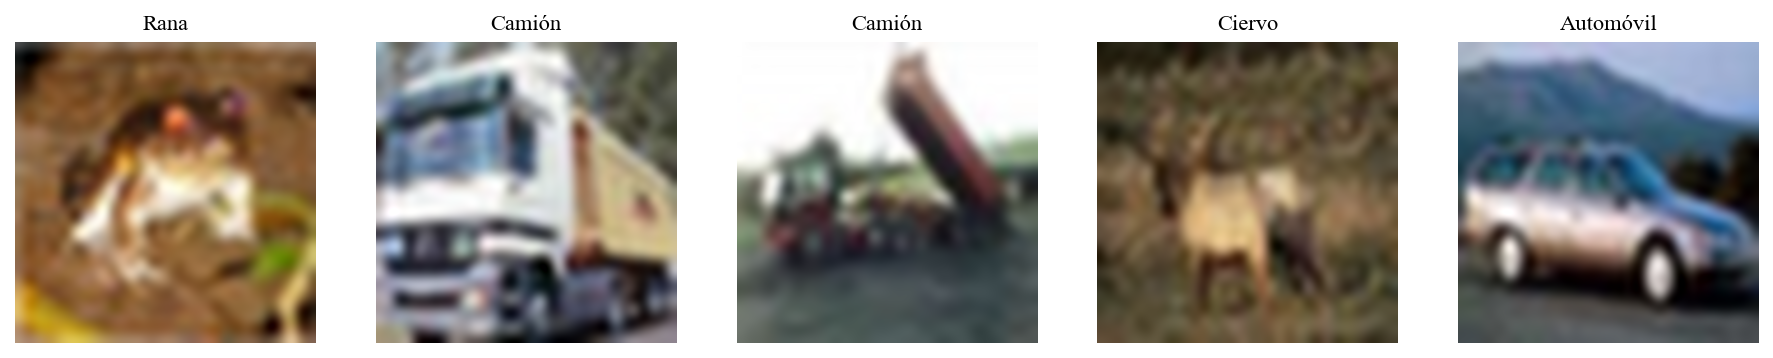

In [33]:
nombre_etiquetas = ["Avión", "Automóvil", "Pájaro", "Gato", "Ciervo", "Perro", "Rana", "Caballo", "Barco", "Camión"]

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 3))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_ent[i], interpolation='lanczos')
    plt.axis('off')
    plt.title(f'{nombre_etiquetas[np.argmax(y_ent[i])]}')
plt.savefig("my_plot.jpg", dpi=300) 
plt.show()

In [19]:
# Creamos el modelo de red neuronal convolucional (CNN)
modelo = Sequential()
modelo.add(Input(shape=(32,32,3)))
modelo.add(Conv2D(32, (3, 3), activation='relu'))
modelo.add(BatchNormalization()),
modelo.add(Dropout(0.2)),
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Conv2D(64, (3, 3), activation='relu'))
modelo.add(BatchNormalization()),
modelo.add(Dropout(0.3)),
modelo.add(MaxPooling2D((3, 3)))
modelo.add(Flatten())
modelo.add(Dense(64, activation='relu'))
modelo.add(Dense(10, activation='softmax'))
modelo.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 30, 30, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 10, 10, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 8, 8, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 2, 2, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          16,448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 36,874 (144.04 KB)

 Trainable params: 36,682 (143.29 KB)

 Non-trainable params: 192 (768.00 B)

In [21]:
# Compilar el modelo
modelo.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Entrenar la red neuronal convolucional
modelo.fit(X_ent, y_ent, epochs=20, batch_size=64, validation_data=(X_pru, y_pru))

Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 63s 71ms/step - accuracy: 0.3516 - loss: 1.9357 - val_accuracy: 0.4045 - val_loss: 1.6398
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.5561 - loss: 1.2499 - val_accuracy: 0.5362 - val_loss: 1.3310
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 50s 64ms/step - accuracy: 0.6036 - loss: 1.1232 - val_accuracy: 0.5143 - val_loss: 1.4565
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.6329 - loss: 1.0423 - val_accuracy: 0.5781 - val_loss: 1.2232
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 72ms/step - accuracy: 0.6510 - loss: 1.0023 - val_accuracy: 0.5702 - val_loss: 1.2196
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6710 - loss: 0.9453 - val_accuracy: 0.6203 - val_loss: 1.0925
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 55s 70ms/step - accuracy: 0.6779 - loss: 0.9202 - val_accuracy: 0.6202 - val_loss: 1.0861
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 60s 76ms/step - accuracy: 0.6858 - loss: 0.9003 - 

In [23]:
# Evaluar el modelo en el conjunto de prueba
perdida, exactitud = modelo.evaluate(X_pru, y_pru)
print(f'Exactitud en el conjunto de prueba: {exactitud * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.6407 - loss: 1.0942
Exactitud en el conjunto de prueba: 64.34%


#### Con aumento de datos

In [24]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configurar la aumentación de datos
gen_datos = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [25]:
# Ajustar el generador de datos al conjunto de entrenamiento
gen_datos.fit(X_ent)

# Entrenar el modelo con aumentación de datos
modelo.fit(gen_datos.flow(X_ent, y_ent, batch_size=64),
          epochs=25,
          validation_data=(X_pru, y_pru))

C:\Users\Carlos Pineda\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 159ms/step - accuracy: 0.5478 - loss: 1.3104 - val_accuracy: 0.5877 - val_loss: 1.2285
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 124s 158ms/step - accuracy: 0.5733 - loss: 1.2082 - val_accuracy: 0.6133 - val_loss: 1.1003
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 119s 152ms/step - accuracy: 0.5736 - loss: 1.2141 - val_accuracy: 0.5854 - val_loss: 1.2699
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 100ms/step - accuracy: 0.5824 - loss: 1.1894 - val_accuracy: 0.5307 - val_loss: 1.3720
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 102ms/step - accuracy: 0.5921 - loss: 1.1636 - val_accuracy: 0.6261 - val_loss: 1.0722
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 112ms/step - accuracy: 0.5909 - loss: 1.1634 - val_accuracy: 0.5706 - val_loss: 1.2289
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 87s 111ms/step - accuracy: 0.5987 - loss: 1.1445 - val_accuracy: 0.6553 - val_loss: 1.0055
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 88s 113ms/step - accuracy: 0.6026 - loss

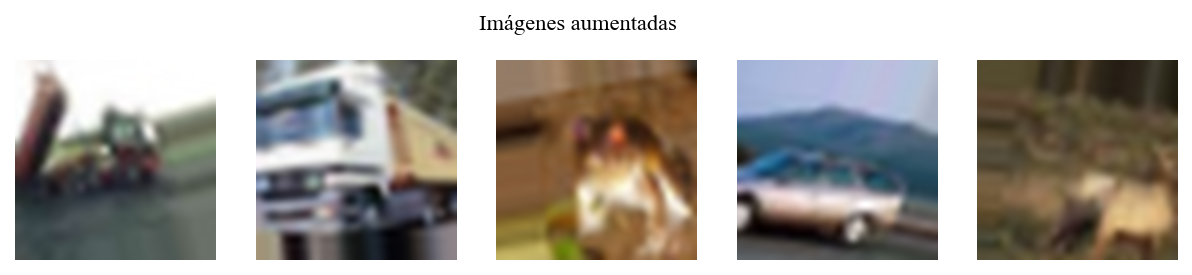

In [26]:
# Visualizar algunas imágenes generadas mediante aumentación de datos
imgs_aumentadas = gen_datos.flow(X_ent[:5], batch_size=1)

plt.figure(figsize=(10, 2))
for i in range(5):
    imagen = next(imgs_aumentadas)[0]
    plt.subplot(1, 5, i+1)
    plt.imshow(imagen, interpolation='lanczos')
    plt.axis('off')
plt.suptitle('Imágenes aumentadas')
plt.savefig("my_plot.jpg", dpi=300)

plt.show()

In [27]:
# Evaluar el modelo en el conjunto de prueba
perdida, exactitud = modelo.evaluate(X_pru, y_pru)
print(f'Exactitud en el conjunto de prueba: {exactitud * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6372 - loss: 1.0605
Exactitud en el conjunto de prueba: 63.85%


In [28]:
# Evaluar el modelo en el conjunto de entrenamiento
perdida, exactitud = modelo.evaluate(X_ent, y_ent)
print(f'Exactitud en el conjunto de entrenamiento: {exactitud * 100:.2f}%')

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6559 - loss: 1.0109
Exactitud en el conjunto de entrenamiento: 65.34%


In [29]:
from tensorflow.keras.preprocessing import image

arc='camión.jpg'
ruta='../Imágenes/' + arc
img=image.load_img(ruta, target_size=(32,32))

x=image.img_to_array(img)
x /= 255.0
image=np.expand_dims(x, axis=0)

clase = modelo.predict(image)
print("La predicción es: ", nombre_etiquetas[np.argmax(clase)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 439ms/step
La predicción es:  Camión
